Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](img/descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
airbnb_new<-data.frame(airbnb$City,airbnb$Room.Type,airbnb$Neighbourhood,airbnb$Accommodates,airbnb$Bathrooms,
                       airbnb$Bedrooms,airbnb$Beds,airbnb$Price,airbnb$Square.Feet,airbnb$Guests.Included,
                       airbnb$Extra.People,airbnb$Review.Scores.Rating,airbnb$Latitude,airbnb$Longitude)

In [3]:
newnames<-c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price',
            'Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')
names(airbnb_new)<-newnames
head(airbnb_new)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Barcelona,Entire home/apt,El Gòtic,2,1,0,1,349,NA,1,0,NA,41.38389,2.171802
2,Barcelona,Entire home/apt,El Raval,6,1,2,3,165,NA,4,20,93,41.38266,2.167558
3,Barcelona,Entire home/apt,Dreta de l'Eixample,5,1,2,2,129,NA,3,20,94,41.38847,2.168451
4,Barcelona,Entire home/apt,La Sagrada Família,5,1,2,2,90,NA,1,0,100,41.40259,2.176946
5,Barcelona,Entire home/apt,La Sagrada Família,6,1,2,3,89,NA,1,0,100,41.40501,2.173369
6,Barcelona,Entire home/apt,Sants-Montjuïc,5,2,3,3,68,NA,1,0,84,41.36726,2.147609


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [4]:
df_madrid<-airbnb_new[(airbnb_new$City)=='Madrid' & (airbnb_new$Room.Type)=='Entire home/apt' & (airbnb_new$Neighbourhood)!='',]


In [5]:
df_madrid$City<-NULL
df_madrid$Room.Type<-NULL

In [6]:
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
26,Palacio,3,1,0,2,65,NA,2,10,96,40.41706,-3.709482
27,Palacio,5,2,2,3,100,NA,4,25,97,40.41934,-3.709556
28,Palacio,6,1,2,4,89,NA,2,10,94,40.42113,-3.708628
29,La Latina,4,1,1,2,49,0,2,20,89,40.41203,-3.709668
30,La Latina,4,1,1,1,89,NA,2,15,97,40.41205,-3.708516
33,La Latina,2,1,1,1,61,NA,1,0,95,40.41189,-3.712093


In [7]:
paste('Creamos la columna de metros cuadrados')
df_madrid$Square.Meters<-round(df_madrid$Square.Feet*0.092903,2)
head(df_madrid)

[1] "Creamos la columna de metros cuadrados"

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
26,Palacio,3,1,0,2,65,NA,2,10,96,40.41706,-3.709482,NA
27,Palacio,5,2,2,3,100,NA,4,25,97,40.41934,-3.709556,NA
28,Palacio,6,1,2,4,89,NA,2,10,94,40.42113,-3.708628,NA
29,La Latina,4,1,1,2,49,0,2,20,89,40.41203,-3.709668,0
30,La Latina,4,1,1,1,89,NA,2,15,97,40.41205,-3.708516,NA
33,La Latina,2,1,1,1,61,NA,1,0,95,40.41189,-3.712093,NA


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [8]:
total<-length(df_madrid$Square.Meters)
con_na<-length(df_madrid$Square.Meters[is.na(df_madrid$Square.Meters)])
paste('el porcentaje de apartamentos que no muestran los Square.Feet es: ',round((con_na/total)*100,3),'%')


[1] "el porcentaje de apartamentos que no muestran los Square.Feet es:  93.805 %"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [9]:
tb1<-table(df_madrid$Square.Meters)
tb1[('0')]
cero<-as.numeric(tb1[('0')])
total<-length(df_madrid$Square.Meters)
paste('el porcentaje de apartamentos con Square.Meters de 0 es: ',round((cero/total)*100,3),'%')

0 
128

[1] "el porcentaje de apartamentos con Square.Meters de 0 es:  2.285 %"

## <font color='red'>**Comentarios**</font>

Estoy preguntando "De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA", con lo cual la división debería ser entre los pisos cuyos metros cuadrados no son NA: sum(!is.na(df_madrid$Square.Meters)

In [10]:
sum(df_madrid$Square.Meters==0,na.rm=T)/sum(!is.na(df_madrid$Square.Meters))*100

[1] 36.88761

Reemplazar todos los 0m^2 por NA 

In [11]:
df_madrid$Square.Meters[df_madrid$Square.Meters==0]<-NA


Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA.

Antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.

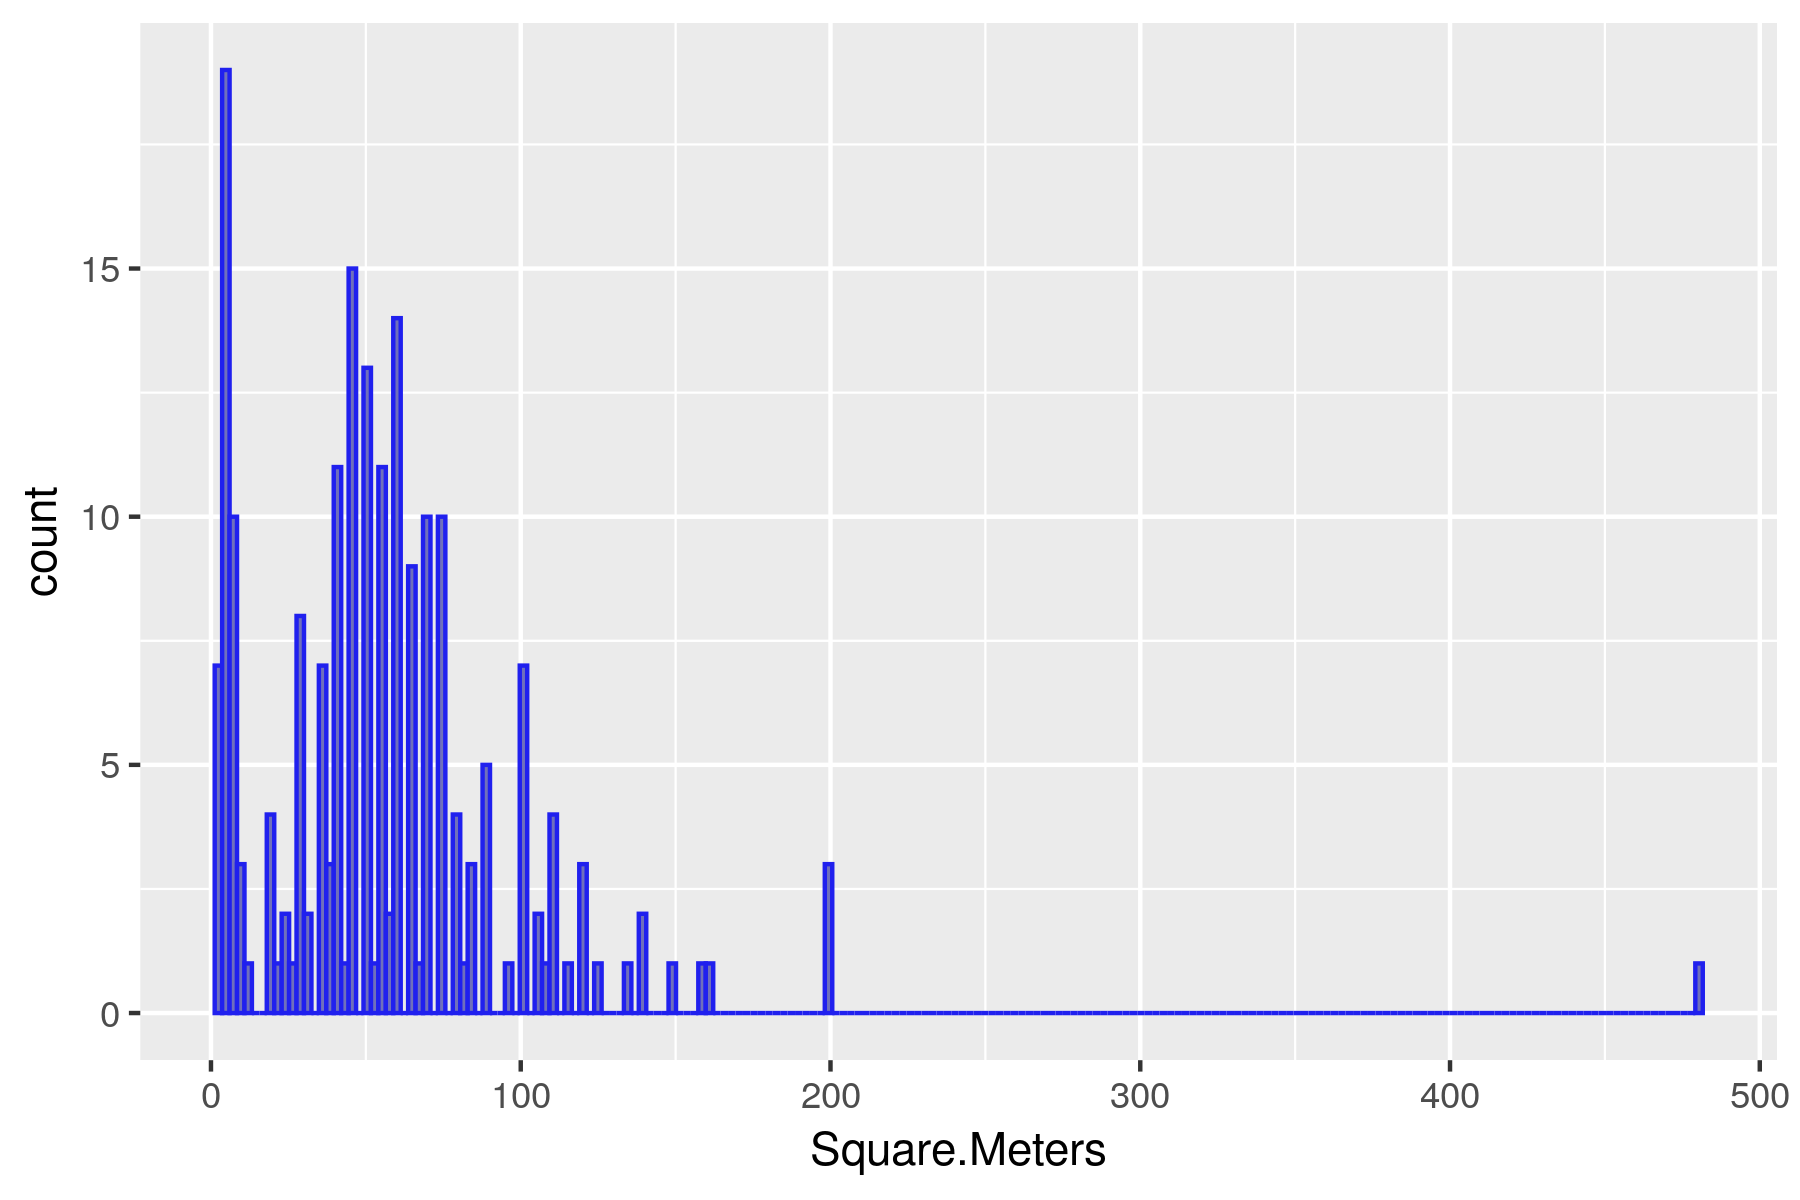

In [12]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)
ggplot(data=na.omit(df_madrid),aes(x=Square.Meters))+
geom_histogram(bins=200,fill='#7070BB', color='#2020EE')

In [13]:
paste('vemos que hay apartamentos con los metros muy pequeños,tambien hay alguno de mas de 400 que podria ser un outlyer, pero lo dejare ya que puede haber apartamentos grandes')

[1] "vemos que hay apartamentos con los metros muy pequeños,tambien hay alguno de mas de 400 que podria ser un outlyer, pero lo dejare ya que puede haber apartamentos grandes"

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [14]:
df_madrid$Square.Meters[df_madrid$Square.Meters<20]<-NA


El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message in resm[lower.tri(resm)] <- round(tky.result$p.adj, 4):
“number of items to replace is not a multiple of replacement length”


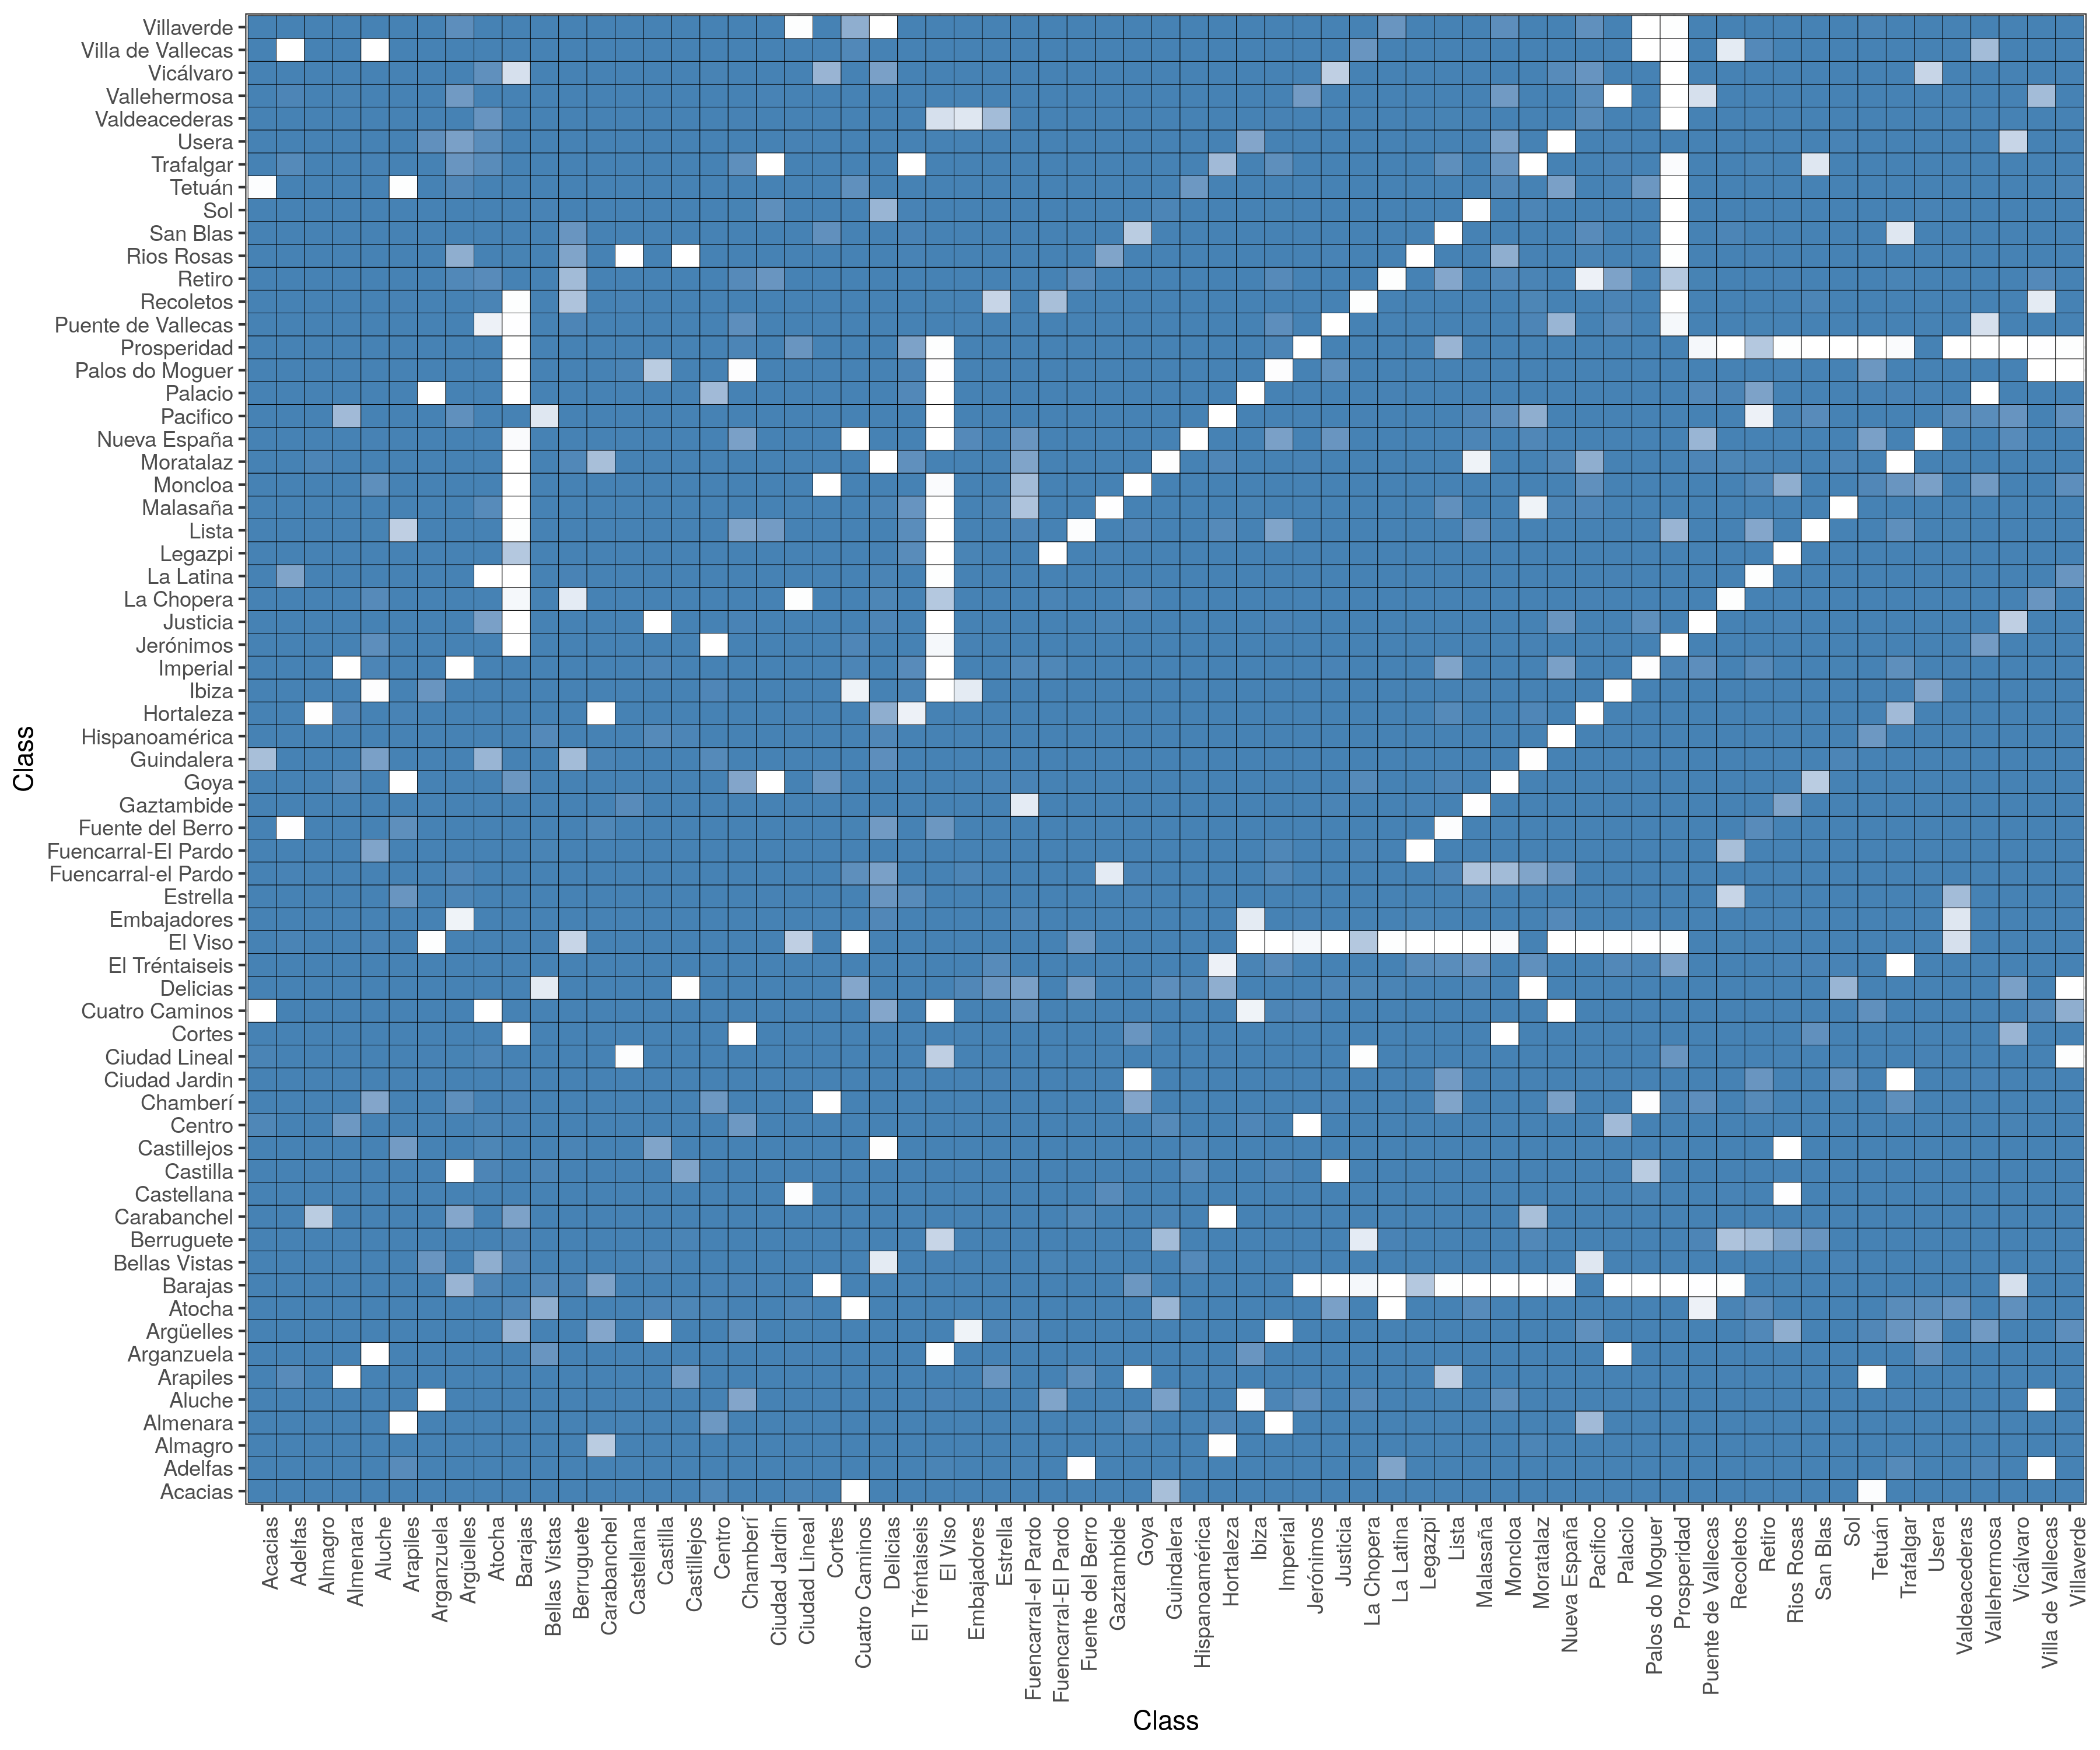

In [15]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
options(repr.plot.height=10,repr.plot.width=12,repr.plot.res = 300)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [16]:
dim(df_madrid)
df_madrid<-na.omit(df_madrid)
dim(df_madrid)

[1] 5601   13

[1] 165  13

## <font color='red'>**Comentarios**</font>

Esto que has hecho es peligroso. Te acabas de cepillar gran parte de tu dataframe porque en las filas haya algún valor con NA. No recomiendo hacer porque el resto de las variables te podrían haber sido útiles.

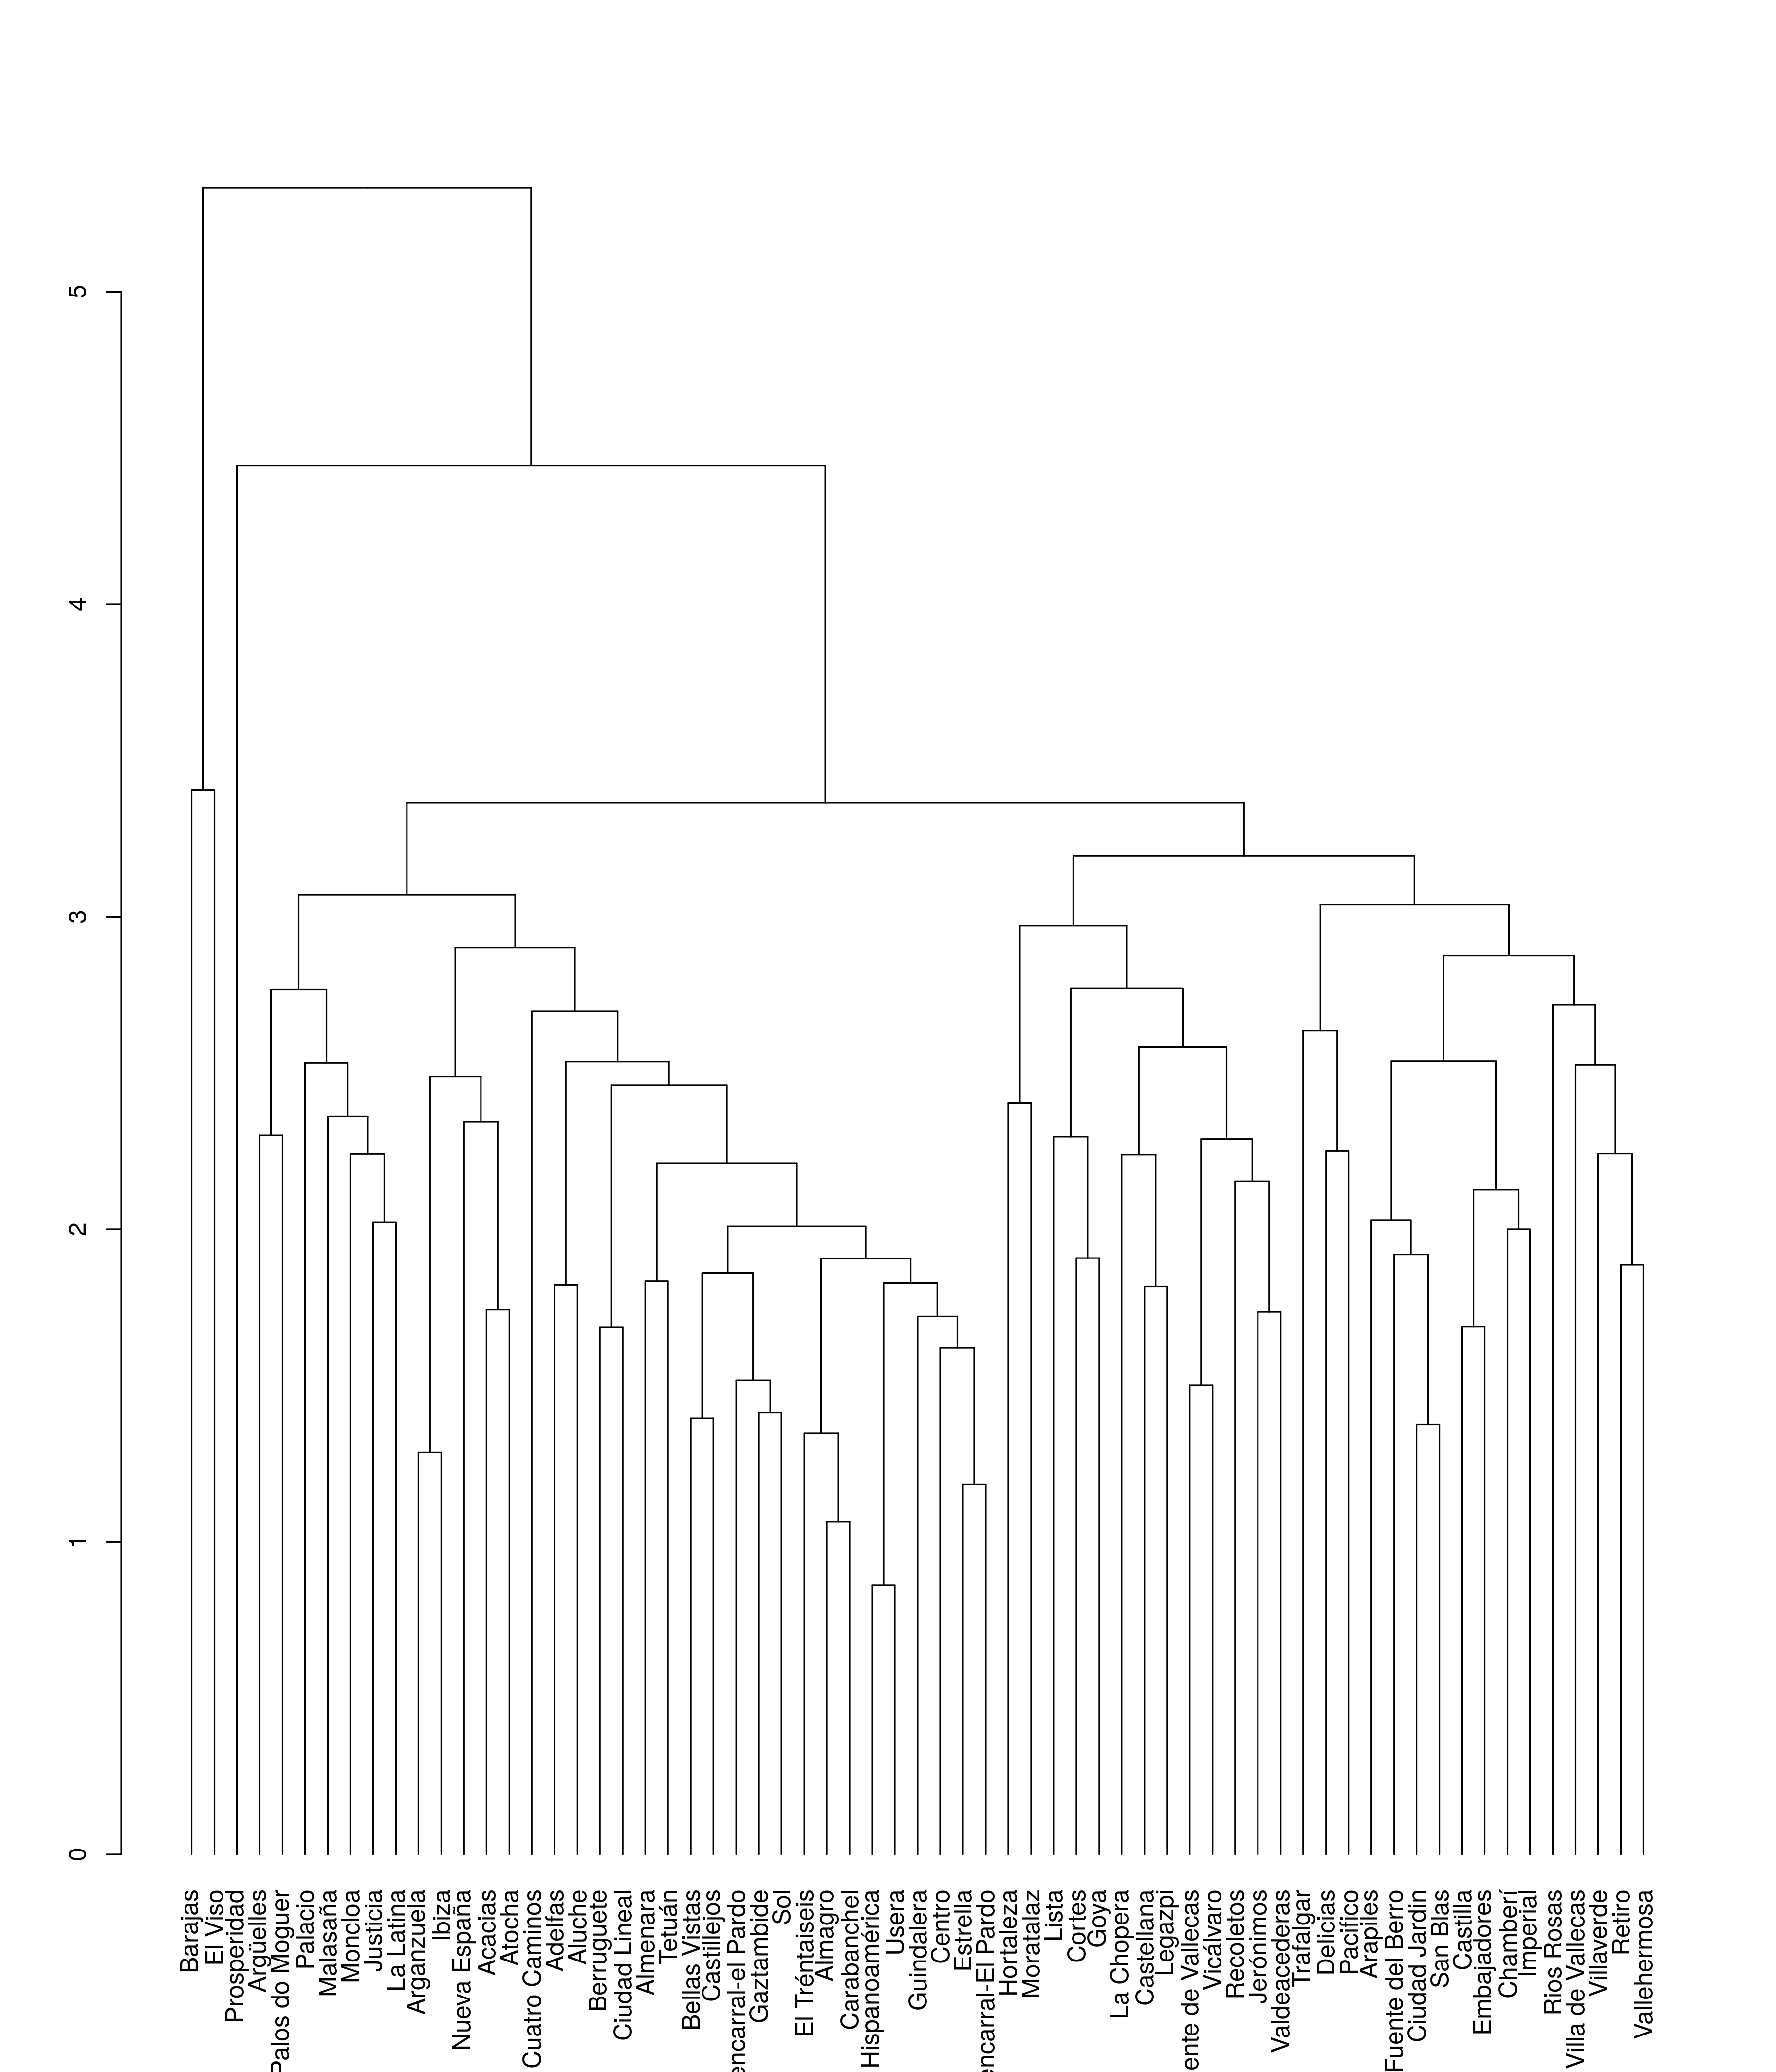

In [17]:
options(repr.plot.height=14,repr.plot.width=12,repr.plot.res = 300)
d <- dist(1-resm, method = "euclidean")
hc <- hclust(d, method = "complete" )
hcd<-as.dendrogram(hc)
plot(hcd)




## <font color='red'>**Comentarios**</font>

La matriz resm nos dice lo juntos o separados que están dos barrios mediante el pvalor. Si el valor entre dos barrios, por ejemplo Adelfas y Acacias es alto (cercano a 1) significa que esos barrios son similares.

Queremos usar esta matriz como matriz de distancias, por eso usamos 1-resm como matris de distancia. Para que aquellos valores cercanos a 1 (que indica gran similitud) pasen a valer casi 0, es decir que la distancia sea muy corta.

Por ese motivo hay que usar la matriz 1-resm como matriz de distancias, como dije por slack y como se explica en el curso en el ejercicio "expresión genética levadura"  en el notebook 7.

Hay que usar la función as.dist() que te transforma la matriz en una matriz de distancias y no dist() que es una función que te calcularía las distancias.

Por ello tenías que haber hecho:
```
d <- as.dist(1-resm)
```

Estableciendo un punto de corte en 0.9, ¿cuantos clusters aparecen?

[1] "Aparecen 64 clusters que tendremos que reducir"

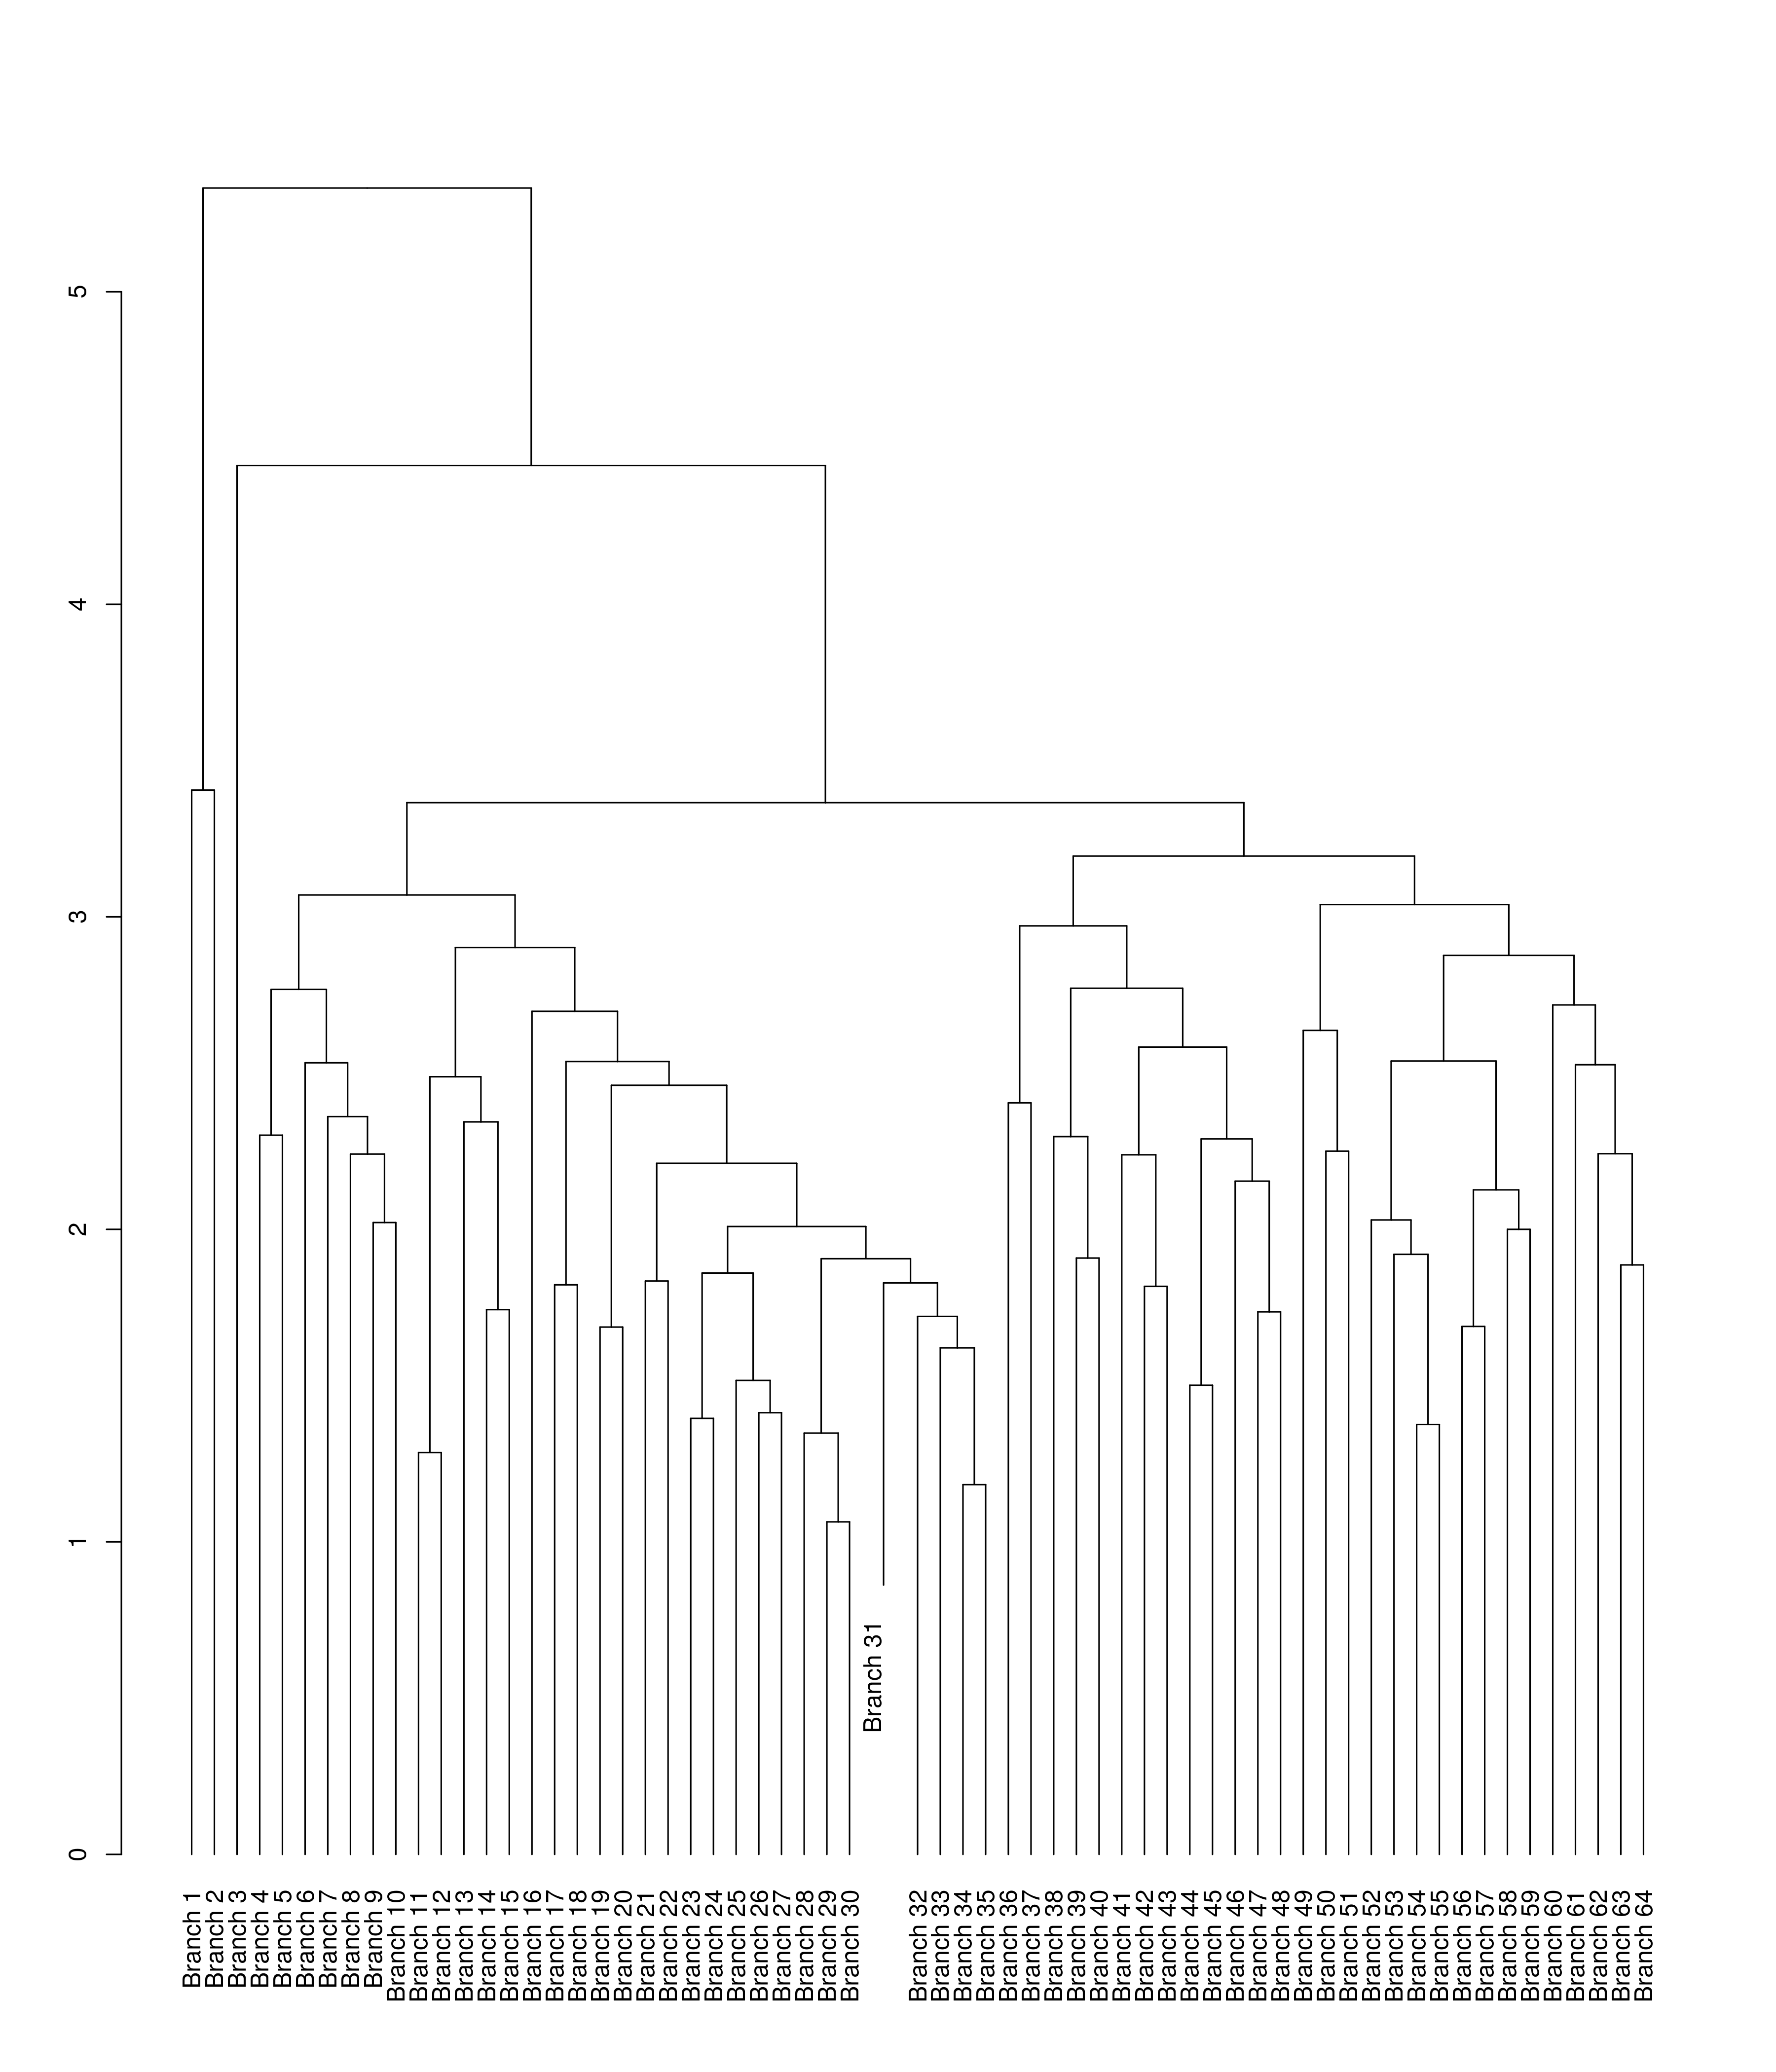

In [18]:
plot(cut(hcd, h = 0.9)$upper)
paste('Aparecen 64 clusters que tendremos que reducir')

In [19]:
paste('cortando la h a 3 lo reducimos a 8 ')
cut(hcd, h = 3)$lower

[1] "cortando la h a 3 lo reducimos a 8 "

[[1]]
'dendrogram' leaf 'Barajas', at height 0 

[[2]]
'dendrogram' leaf 'El Viso', at height 0 

[[3]]
'dendrogram' leaf 'Prosperidad', at height 0 

[[4]]
'dendrogram' with 2 branches and 7 members total, at height 2.767787 

[[5]]
'dendrogram' with 2 branches and 26 members total, at height 2.901771 

[[6]]
'dendrogram' with 2 branches and 13 members total, at height 2.971033 

[[7]]
'dendrogram' with 2 branches and 3 members total, at height 2.636589 

[[8]]
'dendrogram' with 2 branches and 13 members total, at height 2.876664 


Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [20]:
neighb_id<-data.frame(cutree(hc,h=3))
names(neighb_id)<-'neighb_id'
neighb_id$Neighbourhood<-rownames(neighb_id)
df_madrid<-merge(df_madrid,neighb_id,by='Neighbourhood',all=T)
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,Acacias,4,1.0,1,2,60,753,2,12,85,40.40073,-3.706203,69.96,1
2,Acacias,4,1.0,1,3,68,807,2,10,90,40.39691,-3.705202,74.97,1
3,Acacias,4,1.0,1,2,60,538,2,15,98,40.40513,-3.707726,49.98,1
4,Adelfas,6,1.5,2,6,60,753,2,15,94,40.39912,-3.670071,69.96,1
5,Almagro,4,1.0,1,2,75,538,2,10,92,40.43825,-3.693876,49.98,1
6,Almenara,4,1.0,0,1,52,431,2,0,53,40.47226,-3.692849,40.04,1


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [21]:
idx<-sample(1:nrow(df_madrid),nrow(df_madrid)*0.7)
madrid.train<-df_madrid[idx,]
madrid.test<-df_madrid[-idx,]

In [22]:
model_madrid<-lm(Square.Meters~neighb_id+Accommodates+Bedrooms+Price,data=madrid.test)
summary(model_madrid)


Call:
lm(formula = Square.Meters ~ neighb_id + Accommodates + Bedrooms + 
    Price, data = madrid.test)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.588  -7.783  -2.290   8.195  36.884 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.99282    8.76502   0.798    0.429    
neighb_id     0.92698    1.69130   0.548    0.586    
Accommodates -0.19100    1.74431  -0.109    0.913    
Bedrooms     17.90398    3.67920   4.866 1.37e-05 ***
Price         0.37224    0.07816   4.763 1.94e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.08 on 46 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.7805,	Adjusted R-squared:  0.7614 
F-statistic: 40.89 on 4 and 46 DF,  p-value: 1.351e-14


## <font color='red'>**Comentarios**</font>

El entrenamiento se hace sobre el conjunto de train que es el más grande, no sobre test.

Aparte este modelo realmente está mal, la variable neighb_id debería ser un factor.

Aquí estas diciendo que pasar del neighb_id 1 al neighb_id 2 los metros cuadrados disminuyen en -0.197m^2 y al cambiar del 2 al 3 disminuyen en la misma cantidad. Eso no tiene sentido porque los grupos no están ordenados. Por eso has de tratarlos como factor, cada grupo de barrios, cada neighb_id diferente debería tener su coeficiente propio.


Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

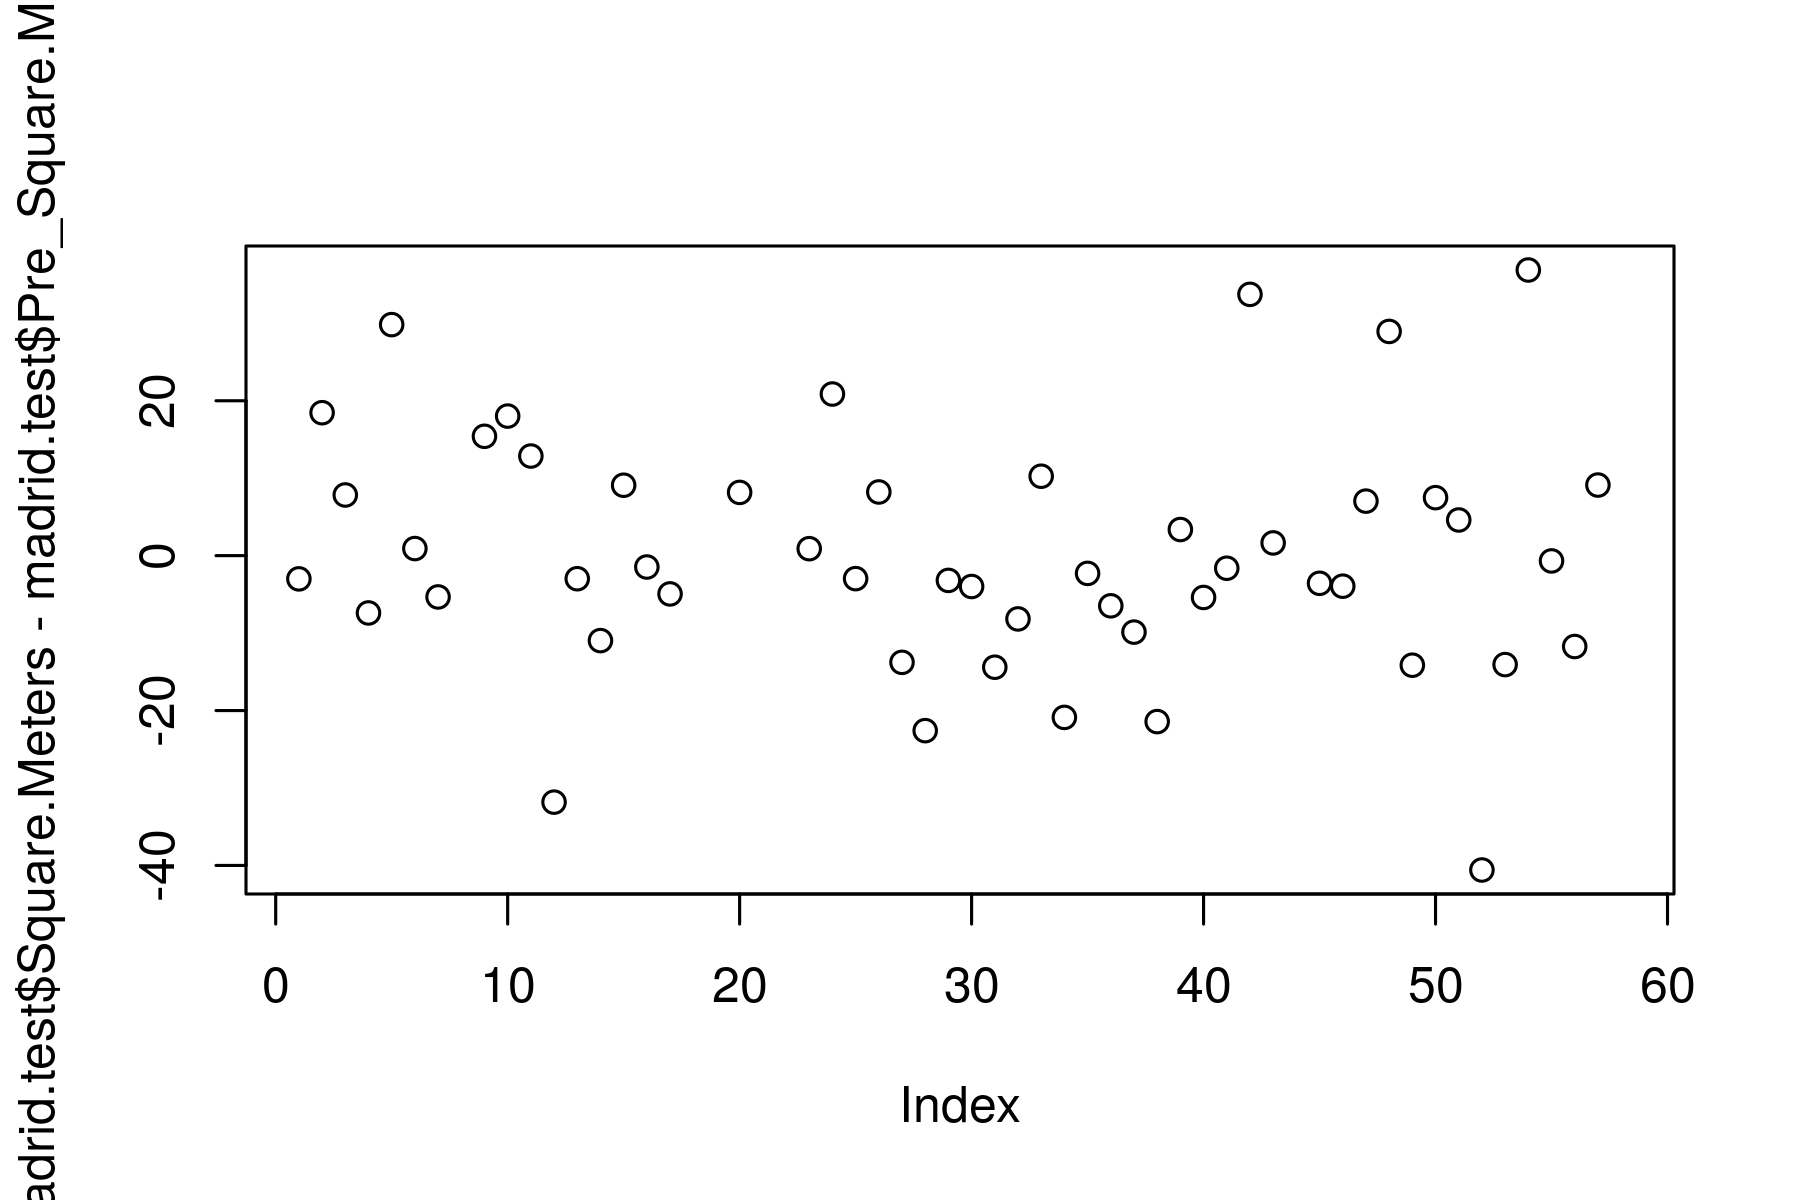

In [23]:
madrid.test$Pre_Square.Meters<-predict(model_madrid,madrid.test)
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)
plot(madrid.test$Square.Meters-madrid.test$Pre_Square.Meters)

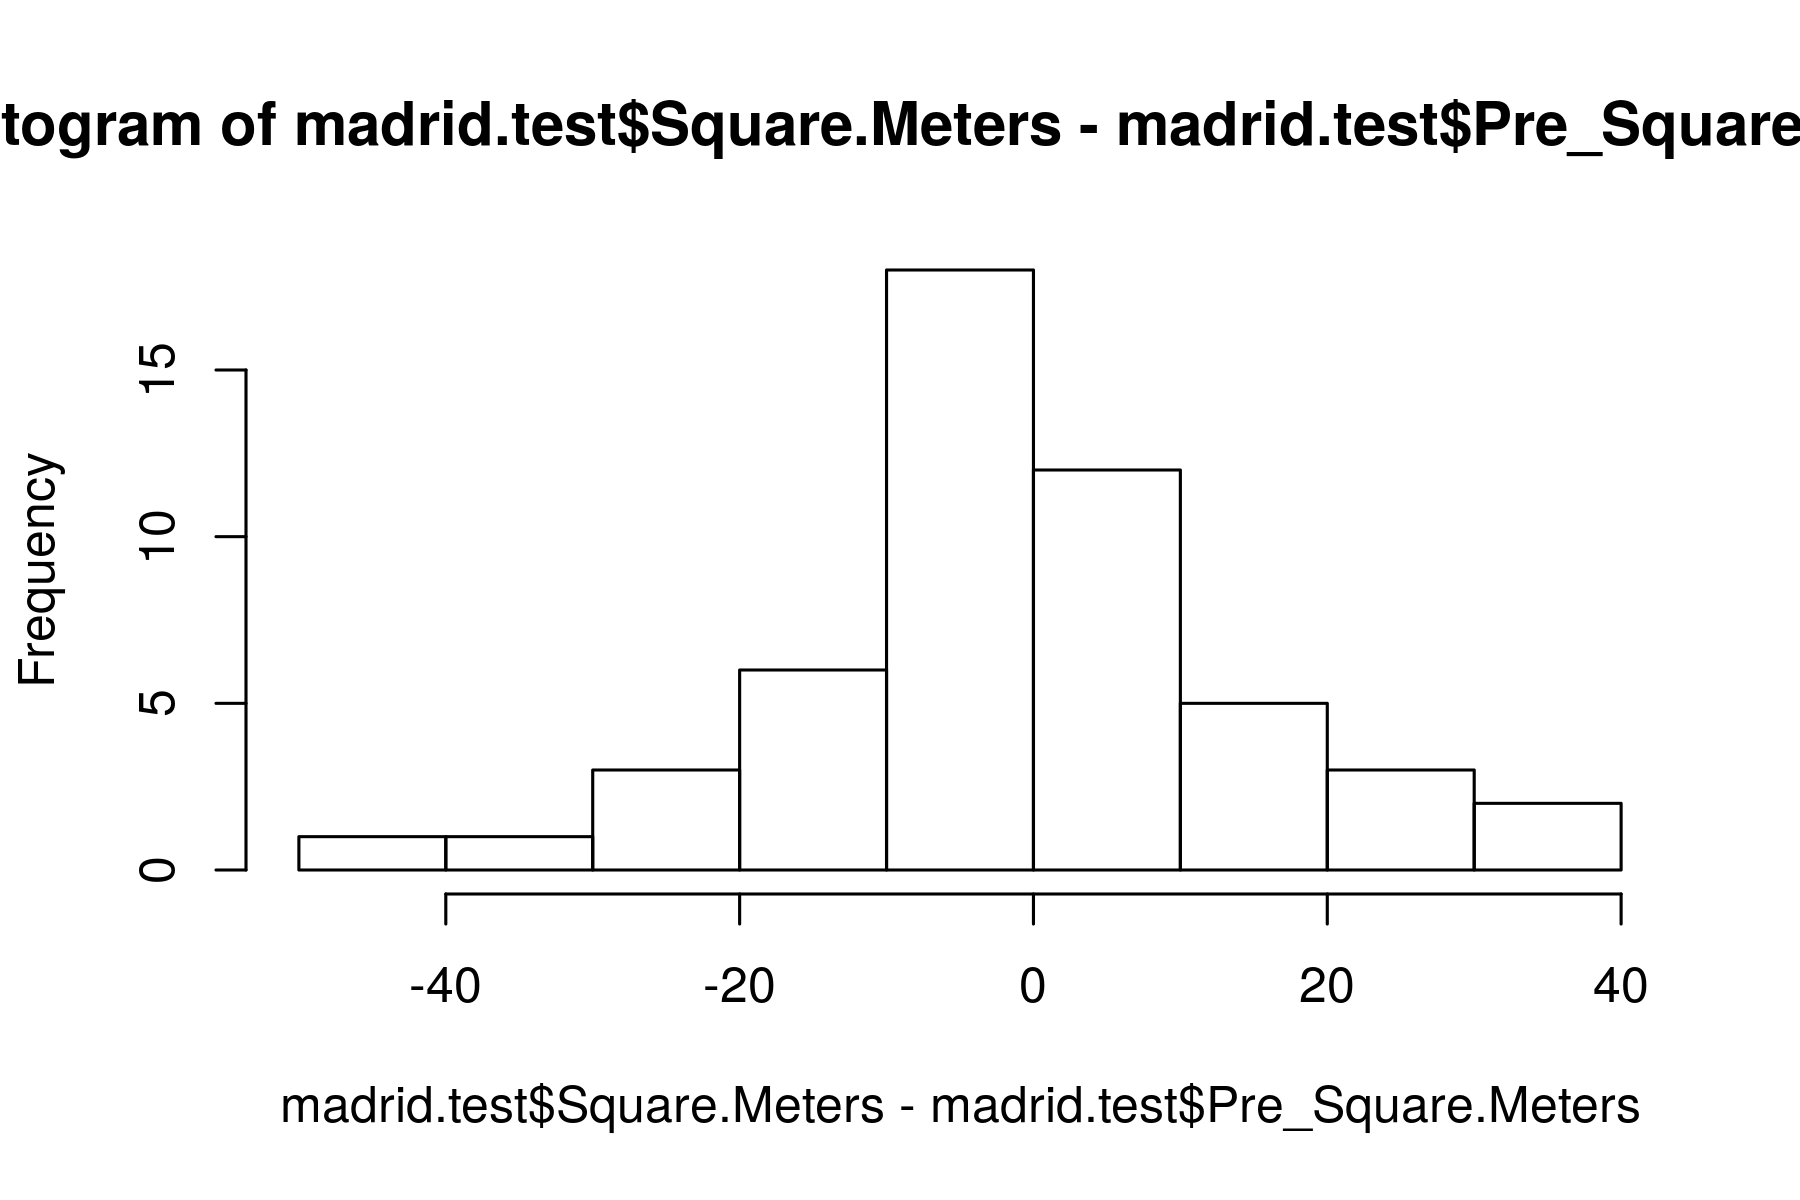

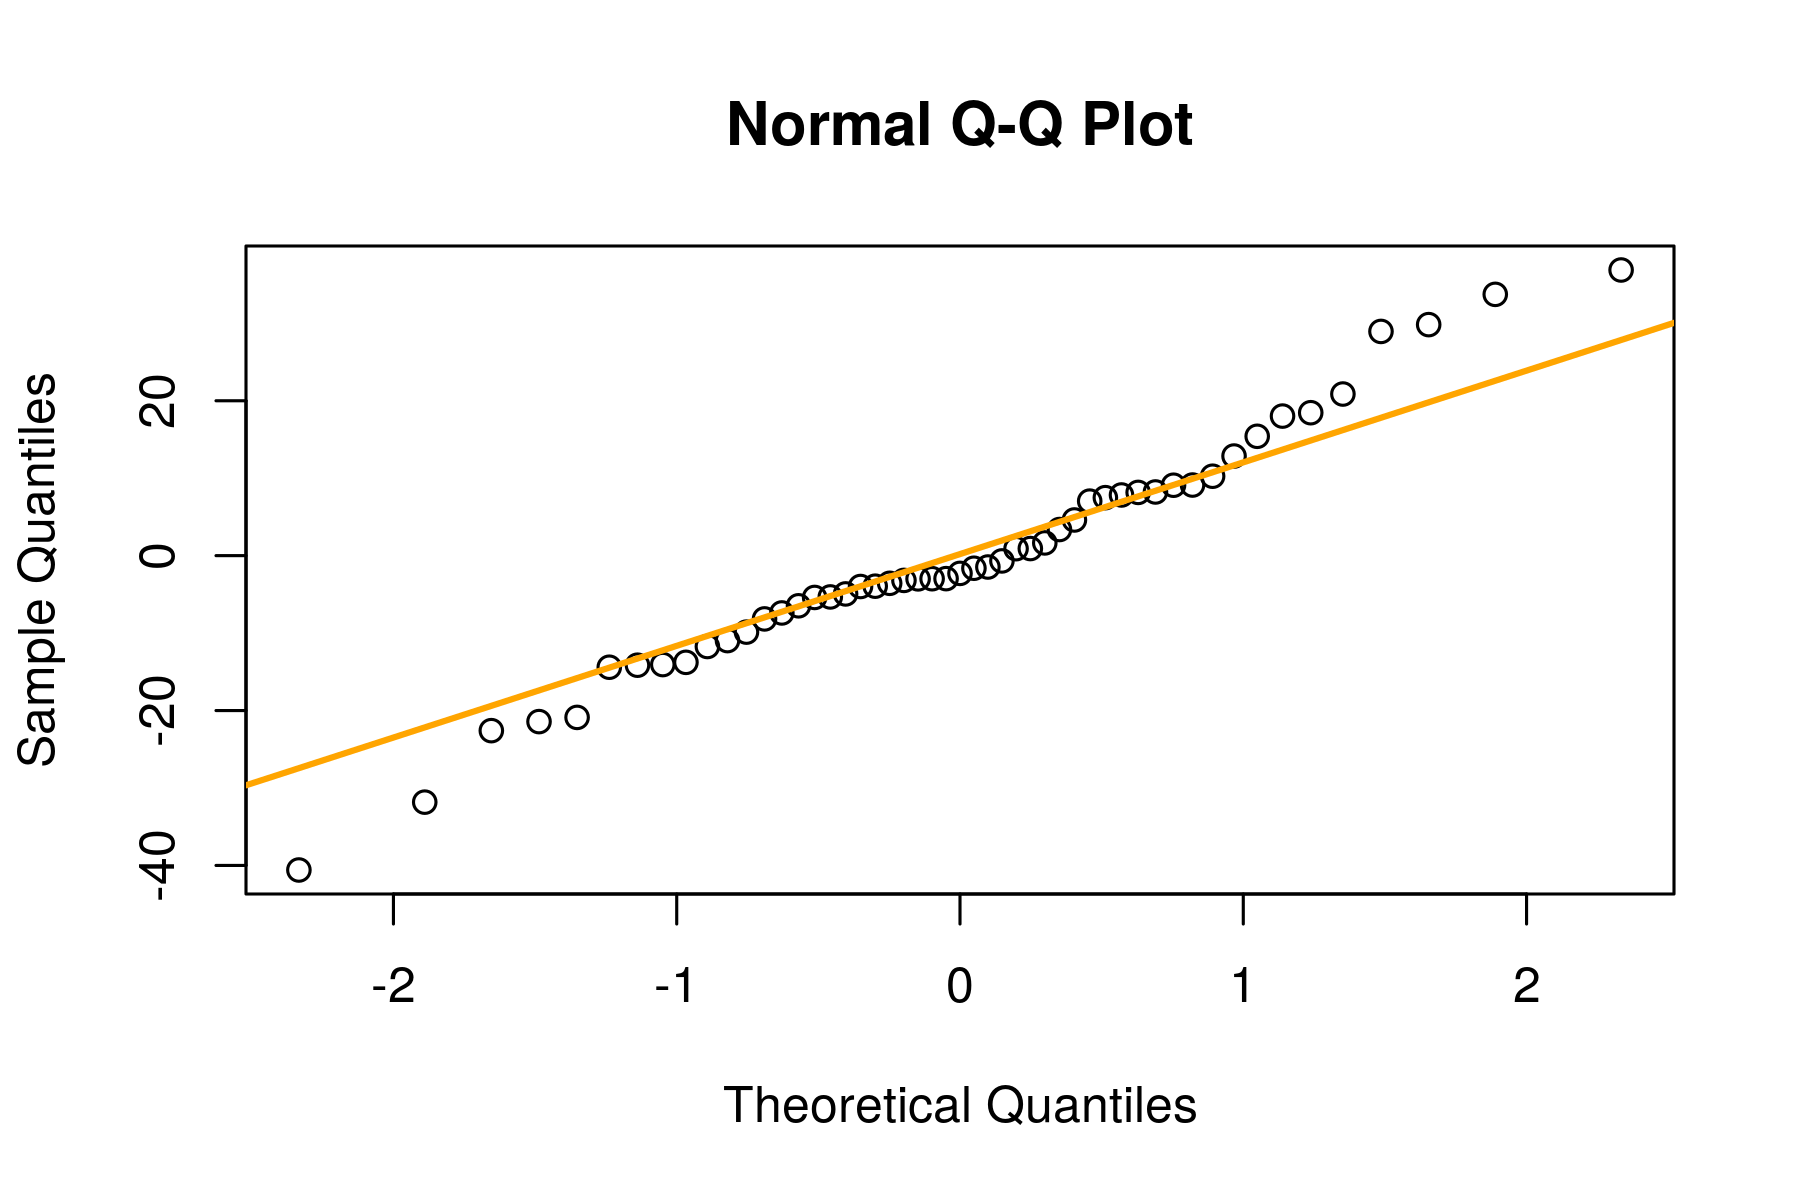

In [24]:
hist(madrid.test$Square.Meters-madrid.test$Pre_Square.Meters,10)
qqnorm(madrid.test$Square.Meters-madrid.test$Pre_Square.Meters)
qqline(madrid.test$Square.Meters-madrid.test$Pre_Square.Meters, col = 'orange', lwd =2)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [25]:
barrio_sol<-df_madrid$neighb_id[df_madrid$Neighbourhood=='Sol']
neighb_id<-unique(barrio_sol)
Accommodates<-6
Price<-80
Bedrooms<-c(2,3)
df_prediccion_metros<-data.frame(neighb_id,Accommodates,Price,Bedrooms)
df_prediccion_metros$Square.Meters<-predict(model_madrid,df_prediccion_metros)
paste('El apartamento tendria: ',round(df_prediccion_metros$Square.Meters[df_prediccion_metros$Bedrooms==3],3),'M2')

[1] "El apartamento tendria:  90.265 M2"

In [26]:
variacion<-df_prediccion_metros$Square.Meters[df_prediccion_metros$Bedrooms==3]-df_prediccion_metros$Square.Meters[df_prediccion_metros$Bedrooms==2]
paste('por cada habitación adicional varia ',round(variacion,3), 'Metros cuadrados')

[1] "por cada habitación adicional varia  17.904 Metros cuadrados"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [30]:
df_madrid$Square.Meters[is.na(df_madrid$Square.Meters)]<-predict(model_madrid,df_madrid[is.na(df_madrid$Square.Meters),])
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,Acacias,4,1.0,1,2,60,753,2,12,85,40.40073,-3.706203,69.96,1
2,Acacias,4,1.0,1,3,68,807,2,10,90,40.39691,-3.705202,74.97,1
3,Acacias,4,1.0,1,2,60,538,2,15,98,40.40513,-3.707726,49.98,1
4,Adelfas,6,1.5,2,6,60,753,2,15,94,40.39912,-3.670071,69.96,1
5,Almagro,4,1.0,1,2,75,538,2,10,92,40.43825,-3.693876,49.98,1
6,Almenara,4,1.0,0,1,52,431,2,0,53,40.47226,-3.692849,40.04,1


In [31]:
dim(df_madrid)

[1] 193  14

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [28]:
df_pca_madrid<-df_madrid
df_pca_madrid$Neighbourhood<-NULL
df_pca_madrid$Square.Feet<-NULL
df_pca_madrid$neighb_id<-NULL
df_pca_madrid<-na.omit(df_pca_madrid)


In [29]:
paste('creamos la funcion')
pca_iguales<- function(data,apartamento) {
    pr_madrid<- prcomp(data)
    t_madrid<- predict(pr_madrid, newdata=apartamento)
    dist<- rowSums((t_madrid[rep(1, times=nrow(pr_madrid$x)),]-pr_madrid$x)^2)
    ord<- sort(dist)[1:6]
    similares<- data[which(dist==ord[2]),]
    similares[2,]<- data[which(dist==ord[3]),]
    similares[3,]<- data[which(dist==ord[4]),]
    similares[4,]<- data[which(dist==ord[5]),]
    similares[5,]<- data[which(dist==ord[6]),]
    similares

}
    

[1] "creamos la funcion"

## <font color='red'>**Comentarios**</font>

Realmente aquí yo habría mirado el peso de los autovalores, y hubiera visto cuales son los más importantes.

Te podrías quedar con los 2 o 3 primeros que son los que tienen más información (mayor varianza) y hacer la comparación sobre esos elementos.

Comparar todos no sería tan efectivo porque con la distancia euclidea le estas dando el mismo poder discriminatorio a todas las variables. Aunque por otra parte los autovectores más altos tampoco tendrían mucha varianza así que no es un problema muy importante.

In [30]:
paste('elegimos un apartamento del data frame')
mi_apartamento<-df_pca_madrid[100,]
mi_apartamento

[1] "elegimos un apartamento del data frame"

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
119,2,1,1,1,74,1,0,97,40.4241,-3.700937,44.97


In [31]:
paste('llamamos a la funcion que nos devuelve los 5 apartamentos iguales')
apt_iguales<-pca_iguales(df_pca_madrid,mi_apartamento)
apt_iguales

[1] "llamamos a la funcion que nos devuelve los 5 apartamentos iguales"

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
95,2,1,1,1,75,1,0,98,40.40862,-3.707649,40.04
131,5,1,1,1,75,1,0,90,40.42721,-3.708675,49.98
59,4,1,1,2,65,1,0,94,40.41023,-3.697554,44.97
37,4,1,1,2,67,2,5,100,40.41307,-3.697037,40.04
60,3,1,2,2,78,2,10,94,40.41082,-3.701474,49.98


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?